In [2]:
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from keras.utils import plot_model

np.set_printoptions(precision=4, suppress = True)

Using TensorFlow backend.


In [3]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

In [4]:
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[200]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

14026302.npz
(301, 64, 64, 3)


In [5]:

plot_model(vae.full_model, to_file='./vae/model.png', show_shapes=True)

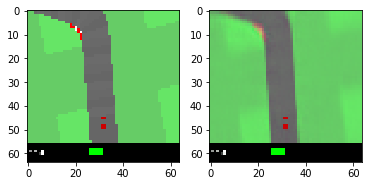

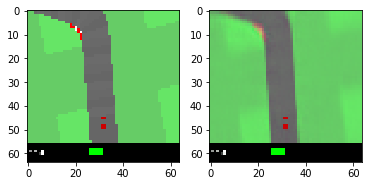

In [6]:
### output from one episode

for idx in range(0, 300):
    plt.gca().cla() 
    
    obs = obs_data[idx]
    z_decoded = vae.full_model.predict(np.array([obs]))[0]
    
    plt.subplot(121)
    plt.imshow( obs)
    plt.subplot(122)
    plt.imshow( z_decoded)
    
#     plt.show()
    display.clear_output(wait=True)
    display.display(plt.gcf()) 

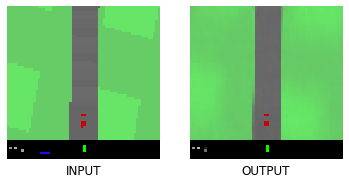

In [7]:
### output from the full_model
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[179]
obs_data = np.load(DIR_NAME + file)['obs']

obs = obs_data[50]
reconstruction = vae.full_model.predict(np.array([obs]))[0]

ax1 = plt.subplot(121)
plt.imshow( obs)
ax1.axis('off')
ax1.text(0.5,-0.1, "INPUT", size=12, ha="center", 
         transform=ax1.transAxes)

ax2 = plt.subplot(122)
plt.imshow( reconstruction)
ax2.axis('off')
ax2.text(0.5,-0.1, "OUTPUT", size=12, ha="center", 
         transform=ax2.transAxes);


In [8]:
encoded_mu_log_var = vae.encoder_mu_log_var.predict(np.array([obs]))
mu = encoded_mu_log_var[0][0]
log_var = encoded_mu_log_var[1][0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae.encoder.predict(np.array([obs]))[0]
print("z = " + str(encoded_z))

mu = [ 0.0382 -0.156   0.02   -0.0838 -0.1171 -0.735   0.1363  0.0535  0.0733
 -1.7827  0.5955 -0.8099  0.0144  0.2047  0.0155  0.016  -0.0331  0.0421
 -0.1878  0.0432 -0.1018  0.2522 -0.0632 -0.1979  0.2446 -0.6326  0.0859
 -0.3144  0.0631  0.0649  0.027   0.0401]
log_var = [-0.0099 -0.0572 -0.0406 -0.0407 -7.4664 -4.4548 -0.1312 -0.0284  0.0165
 -2.6585 -4.553  -3.3147  0.0245 -0.0584  0.0166 -0.0482 -0.0238 -0.0415
 -0.0776 -0.0548 -0.0139 -0.0889 -0.0232 -0.1339 -6.4993 -3.9394 -0.0684
 -0.1765  0.0421 -0.0702  0.0023 -0.0148]
z = [ 0.4973  0.8735 -0.0633  0.9309 -0.0978 -0.8186 -0.3365  0.1692  0.4245
 -2.1805  0.6175 -0.8659 -0.6017  1.9684  0.7795 -0.3299  0.1575 -0.0035
  0.1791 -0.3509 -0.814   0.5398 -2.8133  0.0484  0.1401 -0.6754  0.8143
 -0.6317 -1.8657 -0.3176  0.5302  0.3327]


informative dimensions:


array([ 4,  5,  6,  9, 10, 11, 23, 24, 25, 27], dtype=int64)

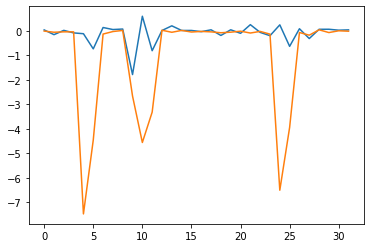

In [9]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs = np.where(abs(log_var) > 0.1)[0]
hot_zs

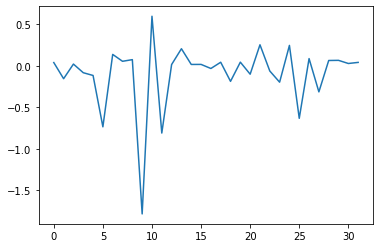

In [10]:
plt.plot(mu);

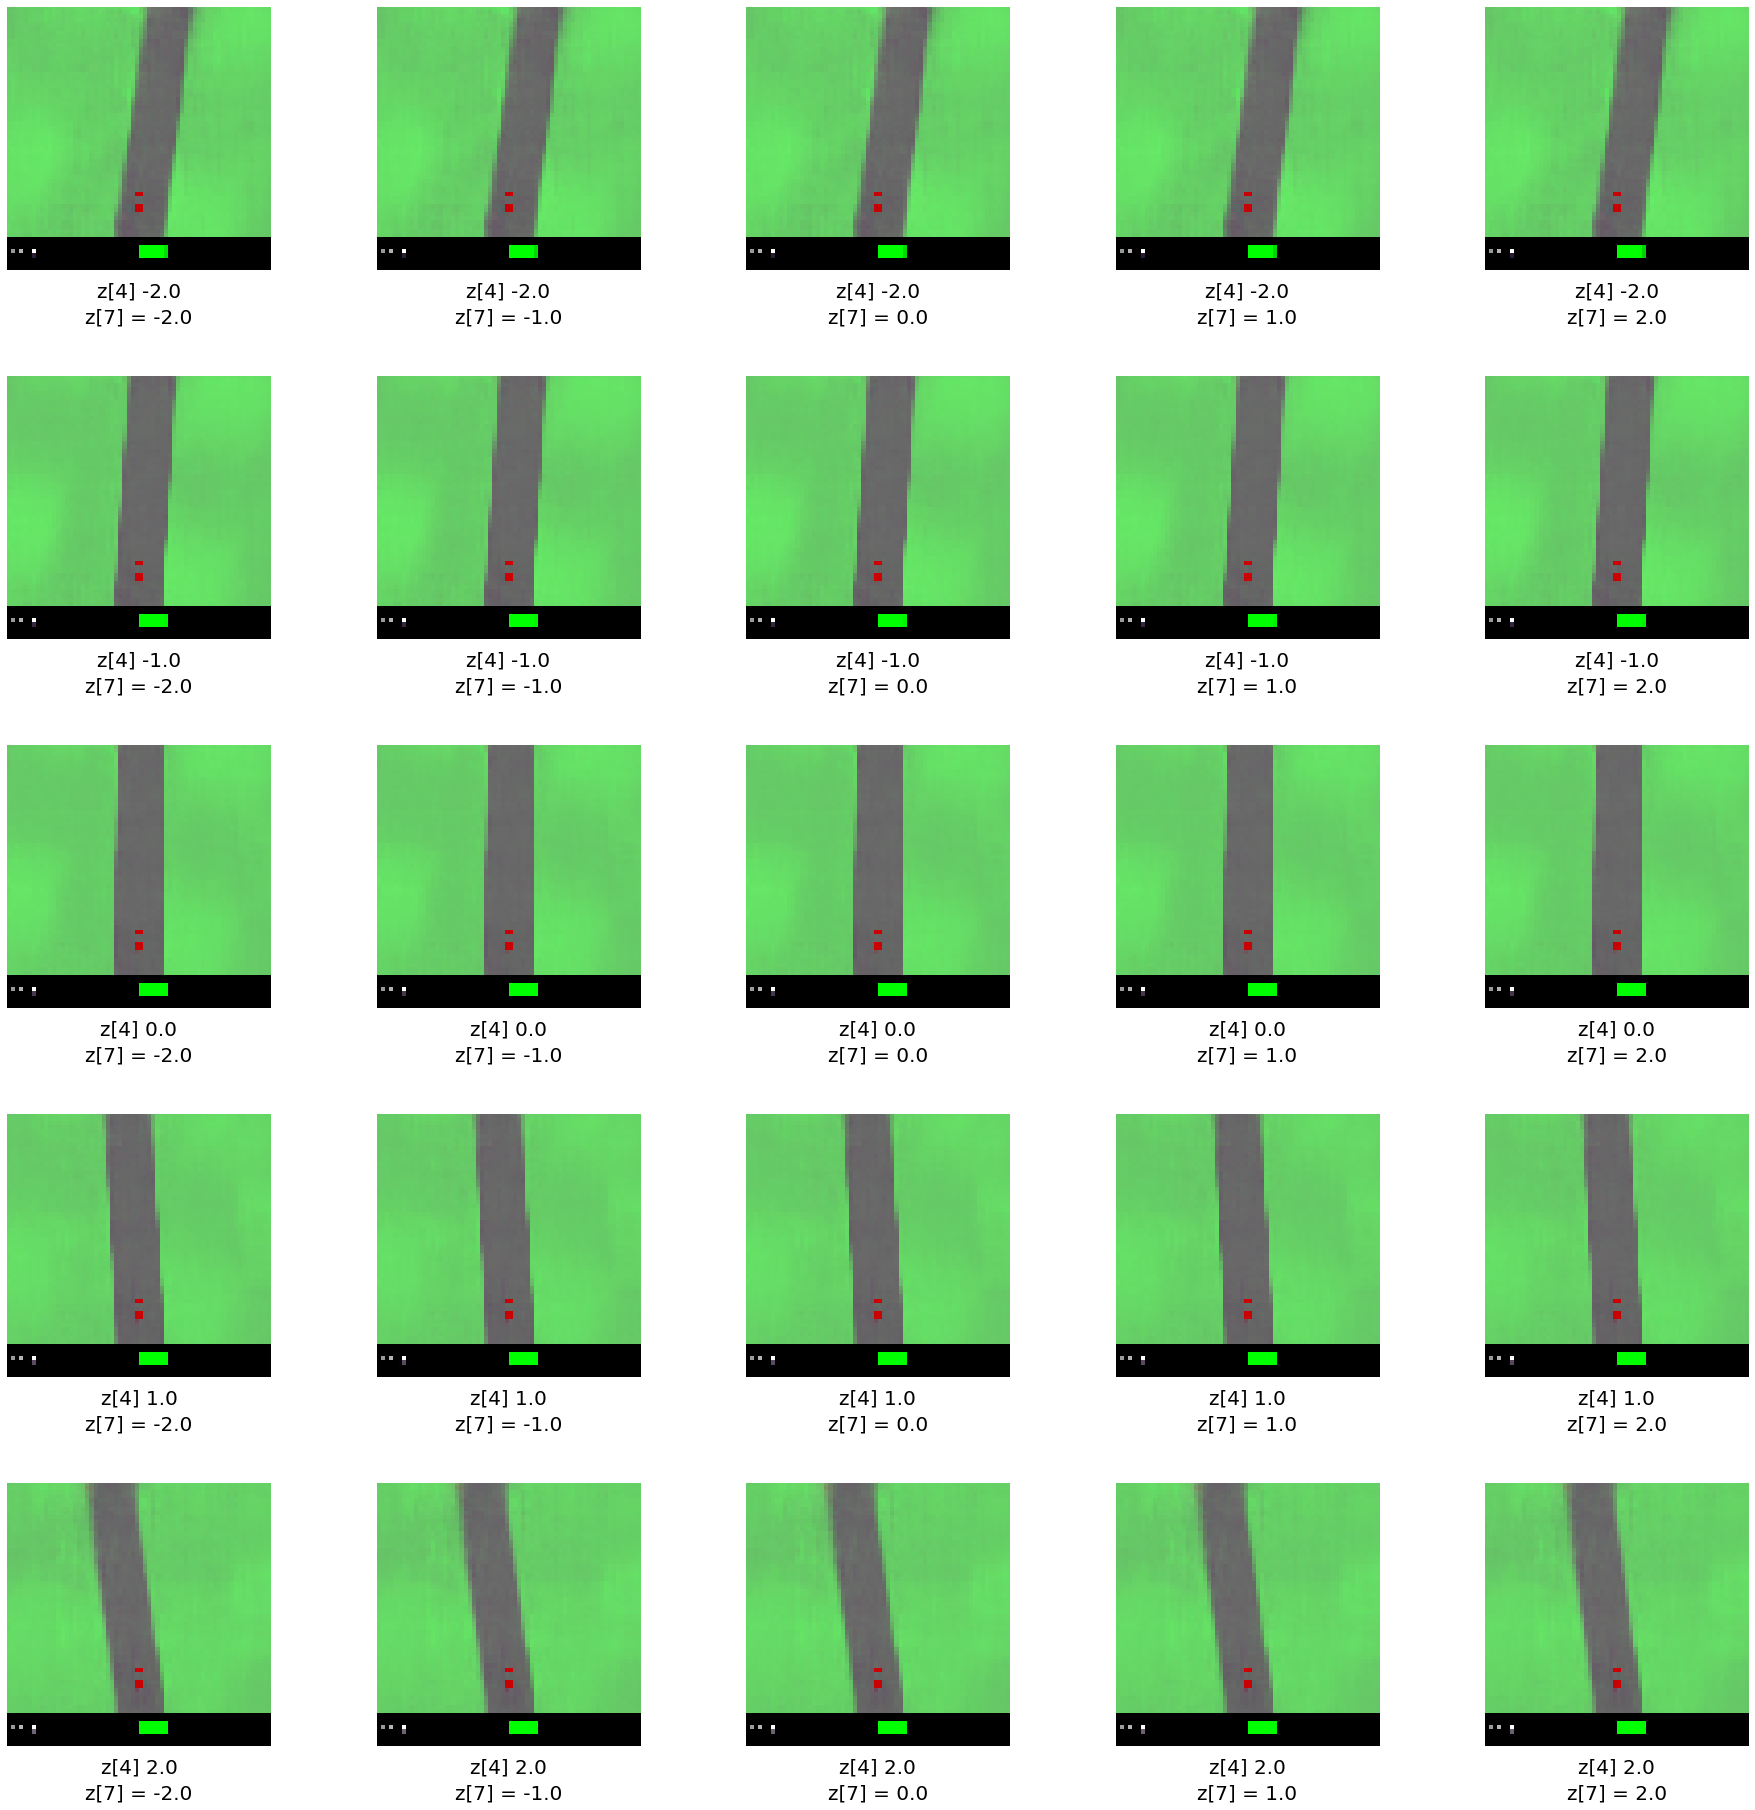

In [11]:
file1 = os.listdir(DIR_NAME)[200]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[260]
obs_data2 = np.load(DIR_NAME + file)['obs']

top_left = vae.encoder.predict(np.array([obs_data1[20]]))[0]
top_right = vae.encoder.predict(np.array([obs_data1[60]]))[0]
bottom_left = vae.encoder.predict(np.array([obs_data2[80]]))[0]
sample_z = vae.encoder.predict(np.array([obs_data[60]]))[0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[4] = (x-2)
        z[7] = (y-2)
        
        decoded_obs = vae.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[4] ' + str(np.round(z[4],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[7] = ' + str(np.round(z[7],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [12]:

def play_with_z(z0 = sample_z[0]
                ,z2 = sample_z[2]
                ,z4 = sample_z[4]
                ,z5 = sample_z[5]
                ,z6 = sample_z[6]
                ,z7 = sample_z[7]
                ,z10 = sample_z[10]
                ,z15 = sample_z[15]
                ,z24= sample_z[24]
                ,z25= sample_z[25]
                ,z27= sample_z[27]
                ):
    z = sample_z.copy()
    z[0] = z0
    z[2] = z2
    z[4] = z4
    z[5] = z5
    z[6] = z6
    z[7] = z7
    z[10] = z10
    z[15] = z15
    z[24] = z24
    z[25] = z25
    z[27] = z27
    
    decoded_obs = vae.decoder.predict(np.array([z]))[0]
    plt.gca().cla() 
    plt.imshow( decoded_obs)

interact(play_with_z
        , z0=(-3.0,3.0,0.1)
        , z2=(-3.0,3.0,0.1)
        , z4=(-3.0,3.0,0.1)
        , z5=(-3.0,3.0,0.1)
        , z6=(-3.0,3.0,0.1)
        , z7=(-3.0,3.0,0.1)
        , z10=(-3.0,3.0,0.1)
        , z15=(-3.0,3.0,0.1)
        , z24=(-3.0,3.0,0.1)
        , z25=(-3.0,3.0,0.1)
        , z27=(-3.0,3.0,0.1)
        )

interactive(children=(FloatSlider(value=0.09620353579521179, description='z0', max=3.0, min=-3.0), FloatSlider…

<function __main__.play_with_z(z0=0.096203536, z2=-0.057106405, z4=-0.2722622, z5=-0.121541515, z6=0.08840793, z7=-0.35972488, z10=1.1466115, z15=-0.57044023, z24=1.8048404, z25=-0.6644306, z27=0.15852216)>